In [16]:
cd /content/drive/My Drive/University/SEM7/CS4622_Machine_Learning/Project_1/Fair_Classification/

/content/drive/My Drive/University/SEM7/CS4622_Machine_Learning/Project_1/Fair_Classification


# Imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar
import warnings
from math import sin, cos, sqrt, atan2, radians,asin

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score


# Load Data

In [18]:
train=pd.read_csv("/content/drive/My Drive/University/SEM7/CS4622_Machine_Learning/Project_1/Fair_Classification/features/Train_FeatureEngineering.csv")
print("Shape of Training Data",train.shape)
test=pd.read_csv("/content/drive/My Drive/University/SEM7/CS4622_Machine_Learning/Project_1/Fair_Classification/features/Test_FeatureEngineering.csv")
print("Shape of Testing Data", test.shape)


Shape of Training Data (17170, 25)
Shape of Testing Data (8576, 25)


In [19]:
train.columns

Index(['tripid', 'additional_fare', 'duration', 'meter_waiting',
       'meter_waiting_fare', 'meter_waiting_till_pickup', 'pickup_time',
       'drop_time', 'pick_lat', 'pick_lon', 'drop_lat', 'drop_lon', 'fare',
       'label', 'pickup_date', 'pickup_day', 'pickup_hour',
       'pickup_day_of_week', 'pickup_month', 'pickup_year',
       'pickup_latitude_round3', 'pickup_longitude_round3',
       'dropoff_latitude_round3', 'dropoff_longitude_round3', 'trip_distance'],
      dtype='object')

In [20]:
test.columns

Index(['tripid', 'additional_fare', 'duration', 'meter_waiting',
       'meter_waiting_fare', 'meter_waiting_till_pickup', 'pickup_time',
       'drop_time', 'pick_lat', 'pick_lon', 'drop_lat', 'drop_lon', 'fare',
       'pickup_date', 'pickup_day', 'pickup_hour', 'pickup_day_of_week',
       'pickup_month', 'pickup_year', 'is_outlier_loc',
       'pickup_latitude_round3', 'pickup_longitude_round3',
       'dropoff_latitude_round3', 'dropoff_longitude_round3', 'trip_distance'],
      dtype='object')

# Data_Preprocessing

In [0]:
# drop_columns_train=['tripid','pickup_time','drop_time','pick_lat','pick_lon','drop_lat','drop_lon','pickup_date','pickup_latitude_round3','pickup_longitude_round3','dropoff_latitude_round3','dropoff_longitude_round3']
# drop_columns_test=['tripid','pickup_time','drop_time','pick_lat','pick_lon','drop_lat','drop_lon','pickup_date','pickup_latitude_round3','pickup_longitude_round3','dropoff_latitude_round3','dropoff_longitude_round3','is_outlier_loc']

drop_columns_train=['tripid','pickup_time','drop_time','pickup_date']
drop_columns_test=['tripid','pickup_time','drop_time','pickup_date','is_outlier_loc']

In [22]:
train_1=train.drop(drop_columns_train,axis=1)
test_1=test.drop(drop_columns_test,axis=1)
print("Shape of Training Data after dropping columns",train_1.shape)
print("Shape of Testing Data after dropping columns",test_1.shape)

Shape of Training Data after dropping columns (17170, 21)
Shape of Testing Data after dropping columns (8576, 20)


### Only for previous data recreation

In [23]:
def encodeDays(day_of_week):
  day_dict={'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}
  return day_dict[day_of_week]
def encodeLabel(label):
  label_dict={'correct':1,'incorrect':0}
  return label_dict[label]
def clean_data(data,isTrain):
  data['pickup_day_of_week']=data['pickup_day_of_week'].apply(lambda x:encodeDays(x))
  if(isTrain):
    data['label']=data['label'].apply(lambda x:encodeLabel(x))
  return data

train_1=clean_data(train_1,True)
test_1=clean_data(test_1,False)
print("Shape of Training Data after cleaning ",train_1.shape)
print("Shape of Testing Data after cleaning", test_1.shape)

Shape of Training Data after cleaning  (17170, 21)
Shape of Testing Data after cleaning (8576, 20)


In [24]:
train_1=pd.get_dummies(train_1)
test_1=pd.get_dummies(test_1)

print("Shape of Training Data after One Hot Encoding",train_1.shape)
print("Shape of Testing Data after One Hot Encoding",test_1.shape)

Shape of Training Data after One Hot Encoding (17170, 21)
Shape of Testing Data after One Hot Encoding (8576, 20)


In [25]:
print('Old size: %d' % len(train))
train_1 = train_1.dropna()
print('New size: %d' % len(train))

Old size: 17170
New size: 17170


In [0]:
X=train_1.drop(['label'],axis=1)
y=train_1['label']

In [27]:
#split data into train and validation data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print("Number of records in training data ",X_train.shape[0])
print("Number of records in validation data ",X_test.shape[0])

Number of records in training data  13569
Number of records in validation data  3393


# Classifiers

## XGBoost CLassifier

In [0]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Linear Regression Classifier

In [0]:
model = LinearRegression()
model.fit(X_train,y_train)
# y_pred=model.predict(X_test)
# lm_rmse=np.sqrt(mean_squared_error(y_pred, y_test))
# print("RMSE for Linear Regression is ",lm_rmse)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## LGBM Classifier

In [0]:
estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 38)


param_grid = {
    'n_estimators': [x for x in range(24,40,2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 5)

In [0]:
gbm = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.125, max_depth=-1,
                                      metric='l1', min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=20,
                                      n_jobs=-1, num_leaves=38, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0)


gbm.fit(X, y,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's l1: 0.143519	valid_0's auc: 0.815797	valid_0's binary_logloss: 0.234416
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.136079	valid_0's auc: 0.841681	valid_0's binary_logloss: 0.217046
[3]	valid_0's l1: 0.129574	valid_0's auc: 0.866503	valid_0's binary_logloss: 0.204351
[4]	valid_0's l1: 0.123835	valid_0's auc: 0.875053	valid_0's binary_logloss: 0.194422
[5]	valid_0's l1: 0.118426	valid_0's auc: 0.890923	valid_0's binary_logloss: 0.184436
[6]	valid_0's l1: 0.113343	valid_0's auc: 0.912693	valid_0's binary_logloss: 0.174558
[7]	valid_0's l1: 0.108781	valid_0's auc: 0.921966	valid_0's binary_logloss: 0.167148
[8]	valid_0's l1: 0.104756	valid_0's auc: 0.922146	valid_0's binary_logloss: 0.161384
[9]	valid_0's l1: 0.101058	valid_0's auc: 0.923574	valid_0's binary_logloss: 0.156205
[10]	valid_0's l1: 0.0978173	valid_0's auc: 0.925675	valid_0's binary_logloss: 0.151914
[11]	valid_0's l1: 0.0948907	valid_0's auc: 0.925974	valid_0's binary_logloss

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.125, max_depth=-1,
               metric='l1', min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=20, n_jobs=-1, num_leaves=38,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

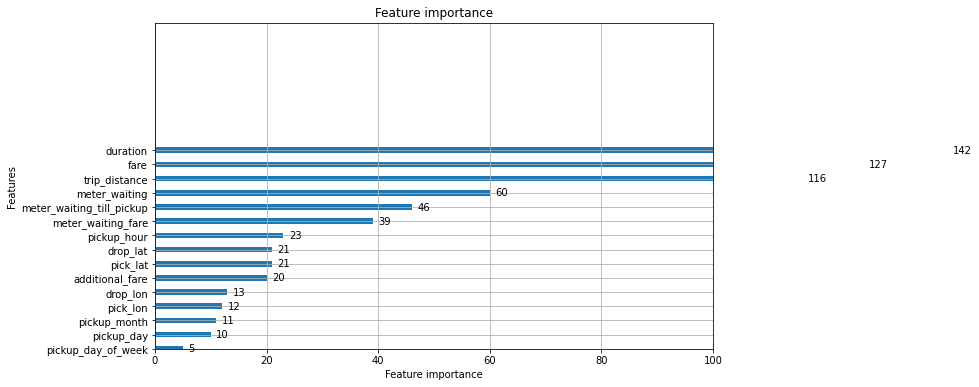

In [0]:
ax = lgb.plot_importance(gbm, height = 0.4, 
                         max_num_features = 50, 
                         xlim = (0,100), ylim = (0,23), 
                         figsize = (10,6))
plt.show()

In [0]:
sorted(gbm.feature_importances_,reverse=True)

[142, 127, 116, 60, 46, 39, 23, 21, 21, 20, 13, 12, 11, 10, 5, 0, 0, 0, 0]

In [0]:

# The code below aims to drop  to keep the features that are included in the most important features. 
temp = 0 
total = sum(gbm.feature_importances_)
for feature in sorted(gbm.feature_importances_, reverse=True):
    temp+=feature
    print(feature)
    if temp/total >= 0.85:
        print(feature,temp/total) # stop when we 
        break

142
127
116
60
46
39
23
21
21 0.8618618618618619


In [0]:
#The above means let go of all variables after PAY_AMT_5
y_pred_prob = gbm.predict_proba(test_1)[:, 1]
# auc_roc_0 = str(roc_auc_score(y_test, y_pred_prob)) # store AUC score without dimensionality reduction
# print('AUC without dimensionality reduction: \n' + auc_roc_0)

In [0]:
X

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3369 entries, 13454 to 5812
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   additional_fare                3369 non-null   float64
 1   duration                       3369 non-null   float64
 2   meter_waiting                  3369 non-null   float64
 3   meter_waiting_fare             3369 non-null   float64
 4   meter_waiting_till_pickup      3369 non-null   float64
 5   pick_lat                       3369 non-null   float64
 6   pick_lon                       3369 non-null   float64
 7   drop_lat                       3369 non-null   float64
 8   drop_lon                       3369 non-null   float64
 9   fare                           3369 non-null   float64
 10  additional_fare_is_outlier     3369 non-null   int64  
 11  meter_waiting_fare_is_outlier  3369 non-null   int64  
 12  fare_is_outlier                3369 non-null

In [0]:
#We can choose to drop the last 6 features from in our new model to reduce dimensionality, and thus save training time and space

X = X_train.drop(['additional_fare','pickup_day_of_week','pickup_month','pickup_day'], axis=1)

## CatBoost

In [28]:
!pip install catboost

In [29]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=100000, 
                           task_type="GPU",
                           devices='0:1')
model.fit(X,
          y,
          verbose=False)

#Test Model

In [30]:
predictions = model.predict(X_test)
predictions = [round(value) for value in predictions]
np.unique(predictions , return_counts=True) 


(array([0, 1]), array([ 231, 3162]))

In [31]:
accuracy = accuracy_score(y_test, predictions)
f1_macro = f1_score(y_test, predictions, average='macro')
f1_binary = f1_score(y_test, predictions, average='binary')
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Macro F1: %.2f%%" % (f1_macro * 100.0))
print("Binary F1: %.2f%%" % (f1_binary * 100.0))

Accuracy: 96.79%
Macro F1: 89.09%
Binary F1: 98.25%


# Save Predictions

In [32]:
predictions_1 = model.predict(test_1)
# predictions_1 = [round(value) for value in y_pred_1]
np.unique(predictions_1 , return_counts=True)

(array([0, 1]), array([ 365, 8211]))

In [0]:
 y_pred = pd.DataFrame({'prediction':predictions_1})
#  y_pred["prediction"] = y_pred["prediction"].astype(int)
#  y_pred['prediction'] = y_pred['prediction'].apply(lambda x: 0 if x < 0.5 else 1)
 y_pred.to_csv("predictions/predications_catboost_4.csv")